### Making filter from measurement and the predicted (g-h filter)
This code based on "Kalman and Bayesian Filter in Python" Book by Roger R Labbe J. (2020)

I experiment with the code

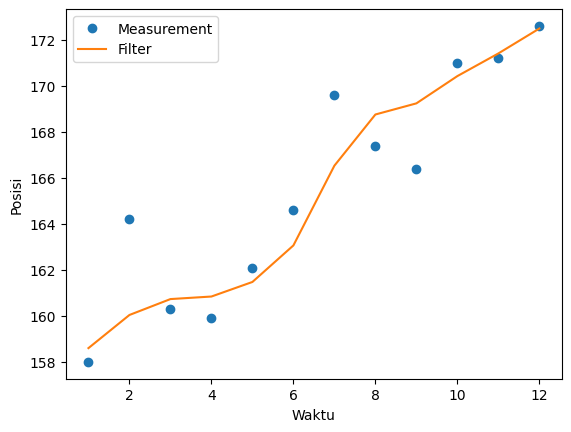

In [93]:
# use this only

# measurement
weight = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6,
          169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

# initial condition
dt = 1 # timestep
g = 4/10 # g scale
h = 1/3 # h scale
x_dot = -1 # gain rate
x0 = 160 # initial ewstimation

def gh_filter(data, x_dot, x0, g, h, dt):
  times = []
  x_estimates = []
  time = 0
  x_estimate = x0
  for measurement in data:
    x_pred = x_estimate + x_dot*dt
    x_estimate = x_pred + g*(measurement - x_pred)
    x_dot = x_dot + h*(measurement - x_pred)/dt
    x_estimates.append(x_estimate)
    time += dt
    times.append(time)
    #print(f"measurement: {measurement}, x_pred: {x_pred}, x_estimate: {x_estimate}, x_dot: {x_dot} ")
  return x_estimates, times

def plot_gh(measurement, estimated, times):
  plt.plot(times, measurement, 'o')
  plt.plot(times, estimated)
  plt.xlabel("Waktu")
  plt.ylabel("Posisi")
  plt.legend(['Measurement', 'Filter'])

x_estimates, times = gh_filter(weight, x_dot, x0, g, h, dt)
plot_gh(weight, x_estimates, times)

In [ ]:
weight = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6,
          169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0 #day
scale_factor = 4.0/10
gain_rate = 1.0

estimate = 160.0

for z in weight:
  last_estimate = estimate
  prediction = last_estimate + gain_rate*time_step
  estimate = prediction + scale_factor * (z-prediction)
  print(f"measurement: {z}, prediction: {prediction}, estimate: {estimate}")

measurement: 158.0, prediction: 161.0, estimate: 159.8
measurement: 164.2, prediction: 160.8, estimate: 162.16
measurement: 160.3, prediction: 163.16, estimate: 162.016
measurement: 159.9, prediction: 163.016, estimate: 161.7696
measurement: 162.1, prediction: 162.7696, estimate: 162.50176
measurement: 164.6, prediction: 163.50176, estimate: 163.941056
measurement: 169.6, prediction: 164.941056, estimate: 166.8046336
measurement: 167.4, prediction: 167.8046336, estimate: 167.64278016
measurement: 166.4, prediction: 168.64278016, estimate: 167.745668096
measurement: 171.0, prediction: 168.745668096, estimate: 169.6474008576
measurement: 171.2, prediction: 170.6474008576, estimate: 170.86844051455998
measurement: 172.6, prediction: 171.86844051455998, estimate: 172.16106430873597


In [ ]:
weight = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6,
          169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0 #day
scale_factor = 4.0/10

predictions = []
estimates = []

def predict(estimate, gain_rate):
  for z in weight:
    last_estimate = estimate
    prediction = last_estimate + gain_rate*time_step
    estimate = prediction + scale_factor * (z-prediction)
    predictions.append(prediction)
    estimates.append(estimate)
    print(f"measurement: {z}, prediction: {prediction}, estimate: {estimate}")

predict(160, 1)
print(predictions)
print(estimates)

measurement: 158.0, prediction: 161.0, estimate: 159.8
measurement: 164.2, prediction: 160.8, estimate: 162.16
measurement: 160.3, prediction: 163.16, estimate: 162.016
measurement: 159.9, prediction: 163.016, estimate: 161.7696
measurement: 162.1, prediction: 162.7696, estimate: 162.50176
measurement: 164.6, prediction: 163.50176, estimate: 163.941056
measurement: 169.6, prediction: 164.941056, estimate: 166.8046336
measurement: 167.4, prediction: 167.8046336, estimate: 167.64278016
measurement: 166.4, prediction: 168.64278016, estimate: 167.745668096
measurement: 171.0, prediction: 168.745668096, estimate: 169.6474008576
measurement: 171.2, prediction: 170.6474008576, estimate: 170.86844051455998
measurement: 172.6, prediction: 171.86844051455998, estimate: 172.16106430873597
[161.0, 160.8, 163.16, 163.016, 162.7696, 163.50176, 164.941056, 167.8046336, 168.64278016, 168.745668096, 170.6474008576, 171.86844051455998]
[159.8, 162.16, 162.016, 161.7696, 162.50176, 163.941056, 166.804633

In [ ]:
weight = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6,
          169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
gain_rate = -1.0
gain_scale = 1/3
estimate = 160

for z in weight:
  #prediksi
  predicted = estimate + gain_rate*time_step
  #update
  estimate = predicted + scale_factor*(z - predicted)
  gain_rate = gain_rate + gain_scale*(z - predicted)/time_step
  print(z, predicted, estimate, gain_rate)

# gain_scale dan scale_factor adalah g-h

158.0 159.0 158.6 -1.3333333333333333
164.2 157.26666666666665 160.04 0.977777777777779
160.3 161.01777777777778 160.73066666666668 0.7385185185185226
159.9 161.4691851851852 160.84151111111112 0.2154567901234543
162.1 161.05696790123457 161.47418074074074 0.5631341563785952
164.6 162.03731489711933 163.0623889382716 1.4173625240054832
169.6 164.47975146227708 166.52785087736623 3.1241120365797883
167.4 169.65196291394602 168.7511777483676 2.3734577319311163
166.4 171.12463548029874 169.23478128817925 0.7985792384982064
171.0 170.03336052667746 170.42001631600647 1.120792396272388
171.2 171.54080871227885 171.4044852273673 1.0071894921794355
172.6 172.41167471954674 172.48700483172803 1.0699645856638542


In [81]:
ground_truth = []
waktu = 0
gain_rate = 1
dt = 1
for z in weight:
  waktu += dt
  ground_truth.append(160+gain_rate*waktu)

In [87]:
dt = 1
g = 4/10
h = 1/3
x_dot = -1
posisi = weight
x0 = 160
def gh_filter(data, x_dot, x0, g, h, dt):
  times = []
  x_estimates = []
  waktu = 0
  x_estimate = x0
  for measurement in data:
    x_pred = x_estimate + x_dot*dt
    x_estimate = x_pred + g*(measurement - x_pred)
    x_dot = x_dot + h*(measurement - x_pred)/dt
    x_estimates.append(x_estimate)
    waktu += dt
    times.append(waktu)
    #print(f"measurement: {measurement}, x_pred: {x_pred}, x_estimate: {x_estimate}, x_dot: {x_dot} ")
  return x_estimates, times
gh_filter(posisi, x_dot, x0, g, h, dt)

([158.6,
  160.04,
  160.73066666666668,
  160.84151111111112,
  161.47418074074074,
  163.0623889382716,
  166.52785087736623,
  168.7511777483676,
  169.23478128817925,
  170.42001631600647,
  171.4044852273673,
  172.48700483172803],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

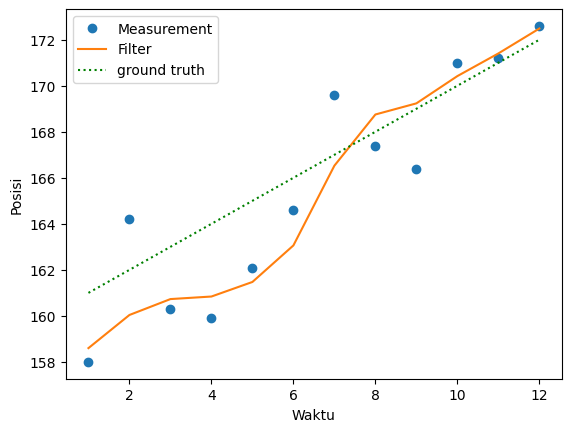

In [89]:
import matplotlib.pyplot as plt
import numpy as np

x_estimates, times = gh_filter(posisi, x_dot, x0, g, h, dt)

plt.plot(times, posisi, 'o')
plt.plot(times, x_estimates)
plt.plot(times, ground_truth, ":g")
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.legend(['Measurement', 'Filter', 'ground truth'])


In [41]:
from numpy.random import randn
# fungsi nambahin noise (simulasi noise)
def gen_data(x0, dx, count, noise_factor):
  return [x0 + dx*i + randn()*noise_factor for i in range(count)]

measurement = gen_data(0,1,30,1)
print(measurement)

[-0.4625792971147465, 2.261871837659653, 3.417707988995383, 1.8506882670908547, 5.509330867338409, 3.7897229690161773, 5.030438515876848, 4.679891552264722, 6.3229312041531145, 8.657889525181837, 9.771273565549128, 12.536312637784853, 12.407927925809677, 11.933190469583202, 16.191406333399044, 14.499614775385508, 15.073074310233078, 17.462041866291198, 17.90815675973929, 18.596615039522476, 20.85159195602847, 20.704150642279966, 22.676643327310117, 23.78058875890431, 24.23413093593715, 25.56207596344792, 28.18863929094129, 27.810563410311545, 29.25645647715265, 28.546683394973126]


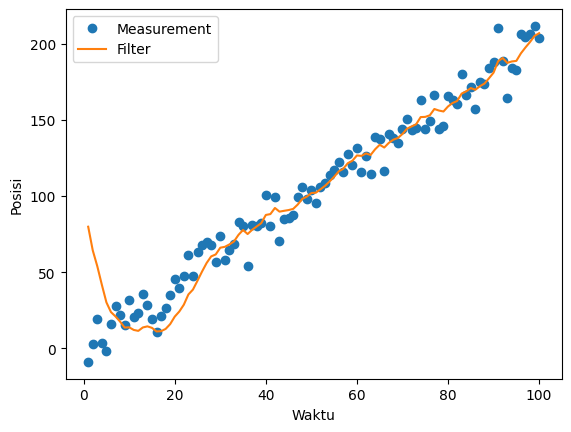

In [91]:
zs = gen_data(x0=5, dx=2, count=100, noise_factor=10)
x_estimates, times = gh_filter(data=zs, x_dot = 2, x0 = 100, g = 0.2, h = 0.02, dt=1)

def plot_gh(measurement, estimated, times):
  plt.plot(times, measurement, 'o')
  plt.plot(times, estimated)
  plt.xlabel("Waktu")
  plt.ylabel("Posisi")
  plt.legend(['Measurement', 'Filter'])

plot_gh(zs, x_estimates, times)